<h3>Biblioteki</h3>

In [1]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from numpy import linalg as LA
from decimal import Decimal
import scipy.sparse
import numpy as np
import time
import math

<h5>Opcjonalne</h5>

In [2]:
# from scipy.sparse.linalg import gmres
# import pypardiso

<h3> Załadowanie notebooków </h3>

In [3]:
%run tests.ipynb
%run mesh.ipynb
%run visualization.ipynb
%run fem.ipynb
%run mapping.ipynb
%run problems.ipynb

<h3> Ustawienia dla problemów </h3>

In [9]:
mywall = np.array([[0,0] , [7,0] , [7,4] , [0,4] ],dtype=object)  # ustawienia kanału
myobstacles = np.array([ [ [1,1] , [2,1] , [2,2] , [1,2] ], [ [2,1] , [3,1] , [3,3] , [2,3] ], [ [4,2] , [5,2] , [5,4] , [4,4] ]  ], dtype=object)  # ustawienia przeszkód

# mywall = np.array([[0,0] , [4,0] , [4,3] , [0,3] ],dtype=object)  # ustawienia kanału
# myobstacles = np.array([ [ [1,1] , [2,1] , [2,2] , [1,2] ]], dtype=object)  # ustawienia przeszkód

# mywall = np.array([[0,-1] , [40,-1] , [40,10] , [0,10] ],dtype=object)  # ustawienia kanału
# myobstacles = np.array([ [ [2,2] , [3,2] , [3,3] , [2,3] ], [ [2,4] , [3,4] , [3,7] , [2,7] ],
#                          [ [3,2] , [4,2] , [4,3] , [3,3] ], [ [3,4] , [4,4] , [4,5] , [3,5] ],
#                          [ [3,6] , [4,6] , [4,7] , [3,7] ], [ [4,2] , [5,2] , [5,5] , [4,5] ],
#                          [ [4,6] , [5,6] , [5,7] , [4,7] ],
                        
#                          [ [7,7] , [8,7] , [8,8] , [7,8] ], [ [8,3] , [9,3] , [9,8] , [8,8] ],
#                          [ [9,7] , [10,7] , [10,8] , [9,8] ],
                        
#                          [ [12,1] , [13,1] , [13,6], [12,6] ], [ [13,1] , [15,1] , [15,2], [13,2] ], 
#                          [ [13,5] , [15,5] , [15,6], [13,6] ], [ [15,1] , [16,1] , [16,6], [15,6] ],
                        
#                          [ [18,2] , [19,2] , [19,7], [18,7] ], [ [19,3] , [20,3] , [20,6], [19,6] ],
#                          [ [20,2] , [21,2] , [21,4], [20,4] ], [ [20,5] , [21,5] , [21,7], [20,7] ],
                        
#                          [ [23,3] , [24,3] , [24,8], [23,8] ], [ [24,3] , [26,3] , [26,4], [24,4] ],
#                          [ [24,5] , [26,5] , [26,6], [24,6] ], [ [24,7] , [26,7] , [26,8], [24,8] ],         
                        
#                          [ [28,1] , [29,1] , [29,2] , [28,2] ], [ [28,3] , [29,3] , [29,6] , [28,6] ],
#                          [ [29,1] , [30,1] , [30,2] , [29,2] ], [ [29,3] , [30,3] , [30,4] , [29,4] ],
#                          [ [29,5] , [30,5] , [30,6] , [29,6] ], [ [30,1] , [31,1] , [31,4] , [30,4] ],
#                          [ [30,5] , [31,5] , [31,6] , [30,6] ]], dtype=object)  # ustawienia przeszkód

# mywall = np.array([[0,0] , [7,0] , [7,4] , [0,4] ],dtype=object)  # ustawienia kanału
# myobstacles = np.array([ [ [1,1] , [3,1] , [3,3] , [1,3] ], [ [4,1] , [6,1] , [6,3] , [4,3] ]], dtype=object)  # ustawienia przeszkód

# mywall = np.array([[0,0] , [7,0] , [7,4] , [0,4] ],dtype=object)  # ustawienia kanału
# myobstacles = np.array([ [ [1,1] , [3,1] , [3,3] , [1,3] ]], dtype=object)  # ustawienia przeszkód


# mywall = np.array([[0,0] , [2,0] , [2,1] , [0,1] ],dtype=object)
# myobstacles = np.array([], dtype=object)

# mywall = np.array([[0,0] , [3,0] , [3,3] , [0,3] ],dtype=object)
# myobstacles = np.array([[[1,1] , [2,1] , [2,2] , [1,2] ]], dtype=object)

dirichlet_fun = ['left']  # spośród ['left','right','top','bottom']
dirichlet_zero = ['bottom', 'top']  # spośród ['left','right','top','bottom'] \ dirichlet_fun

global dirichlet_function_option  # wybór funkcji przepływu
dirichlet_function_option = 2

global viscosity  # stała lepkości
viscosity = 0.001

debug_mode = False
scale_axes = 0.1  # przeskalowanie obu osi siatki
scale_elements_width = 2  # przeskalowanie szerokości elementów siati
scale_elements_height = 2  # przeskalowanie wysokości elementów siati
force_option = 1  # wybór opcji wektora ciśnienia


<h3> Pojedynczy problem </h3>

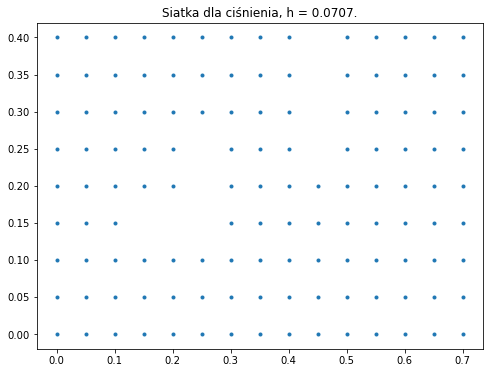

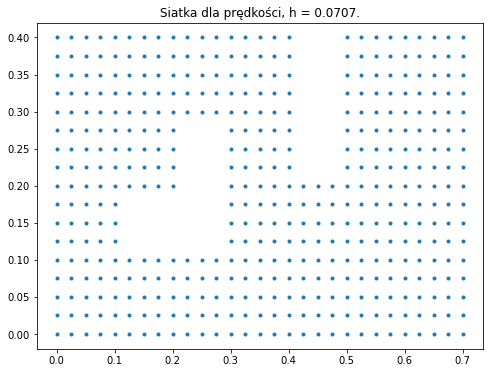

Liczba równań:  998


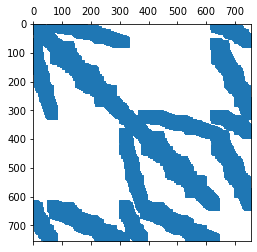

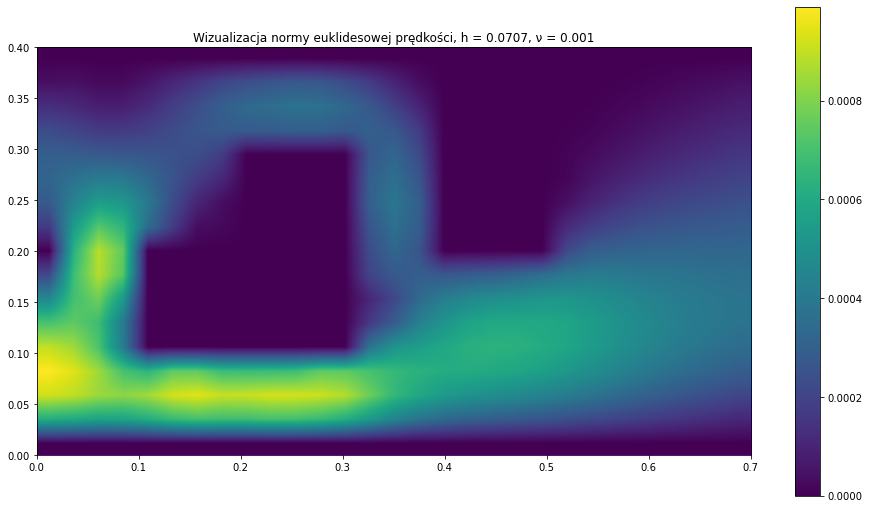

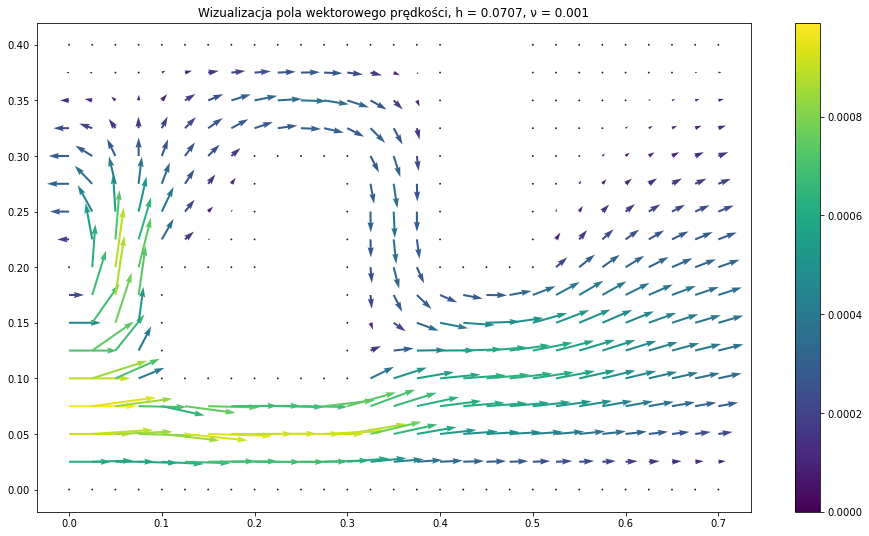

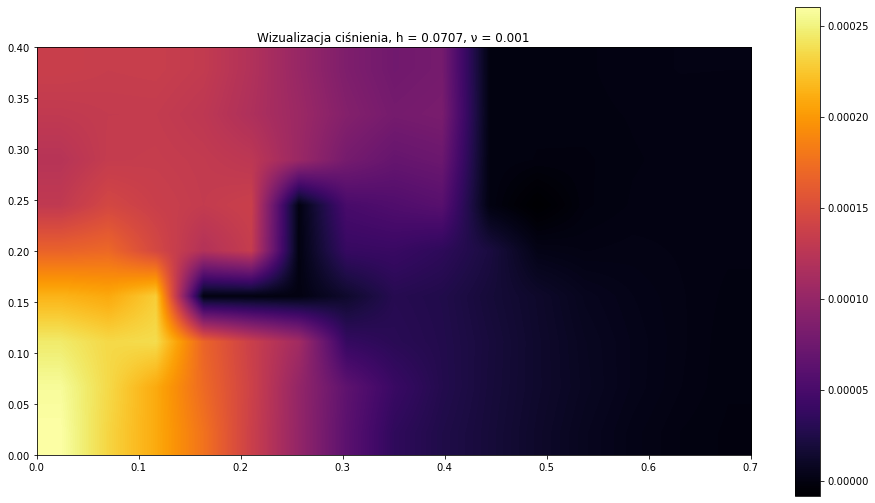

In [10]:
single_stokes_stationary(wall=mywall, obstacles=myobstacles, debug_mode = debug_mode,
                              dirichlet_z = dirichlet_zero, dirichlet_f = dirichlet_fun, scale_axes = scale_axes, scale_elements_width = scale_elements_width, scale_elements_height = scale_elements_height, force_option = force_option, viscosity=viscosity)

<h3> Problem dla kilku siatek </h3>

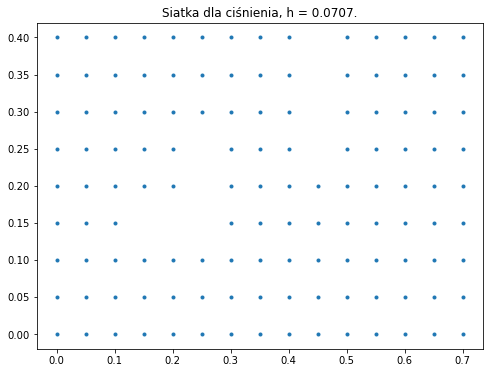

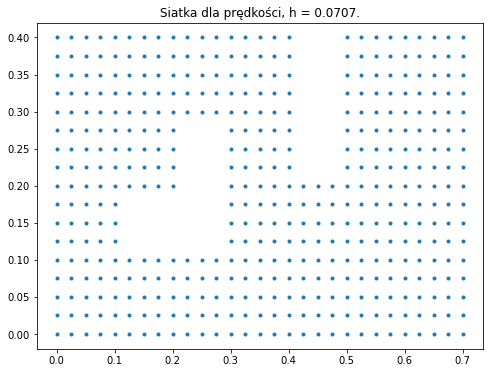

Liczba równań:  998


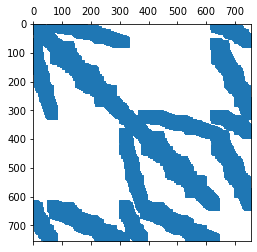

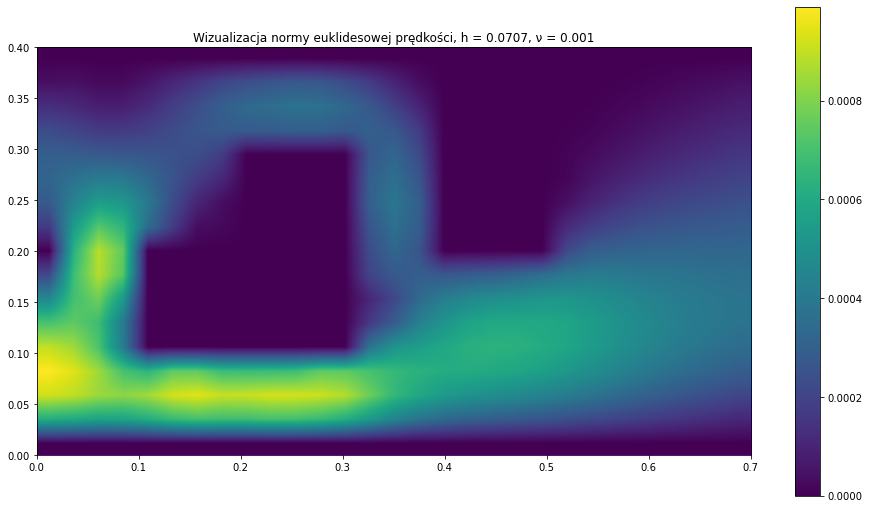

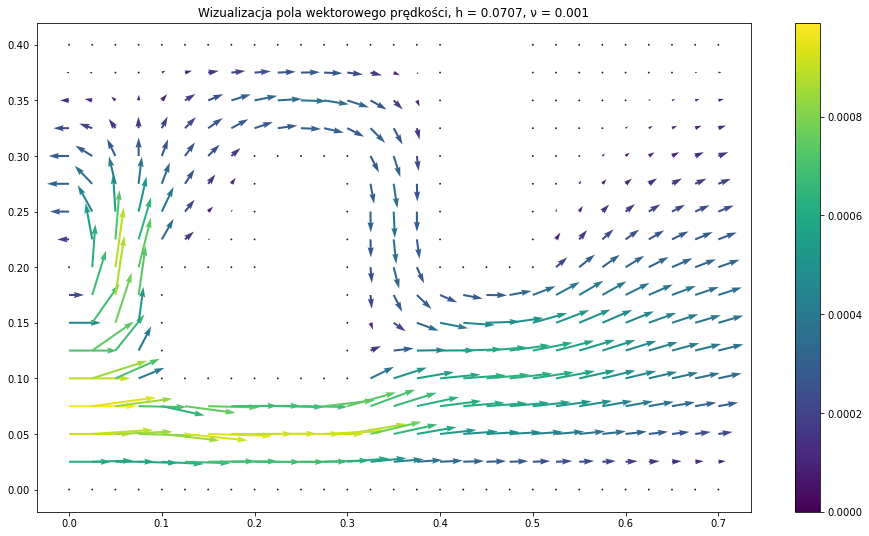

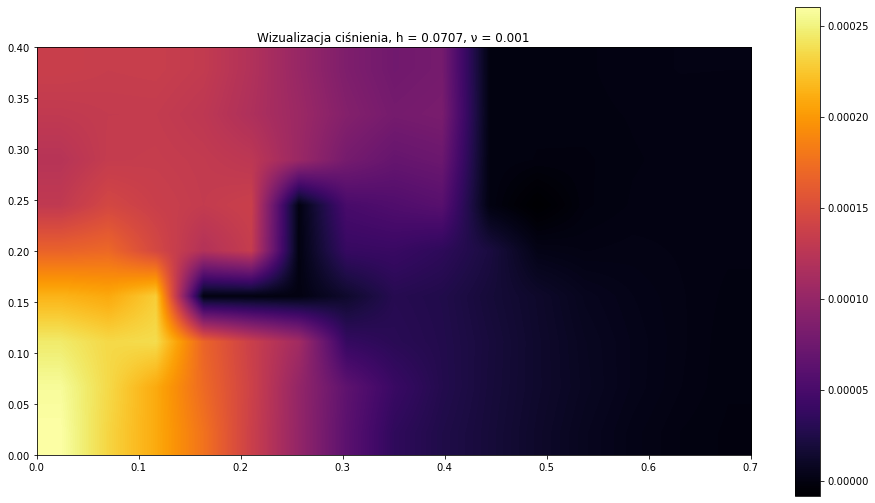

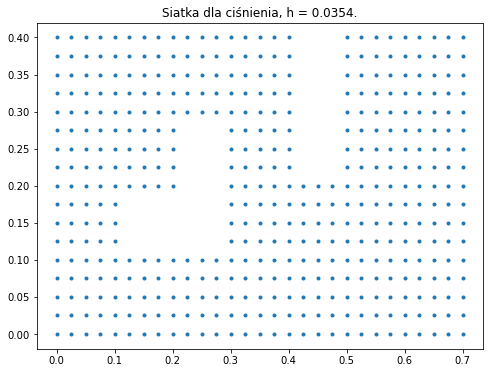

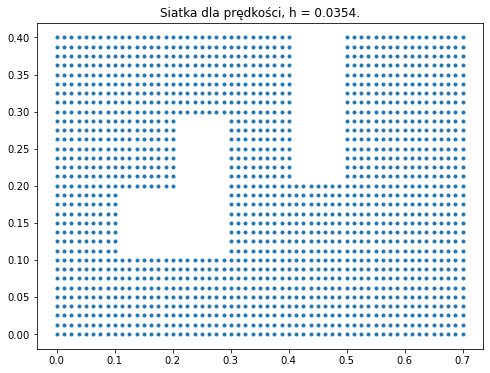

Liczba równań:  3652


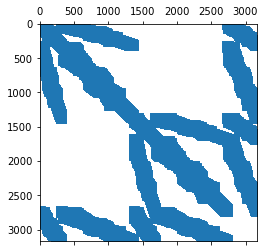

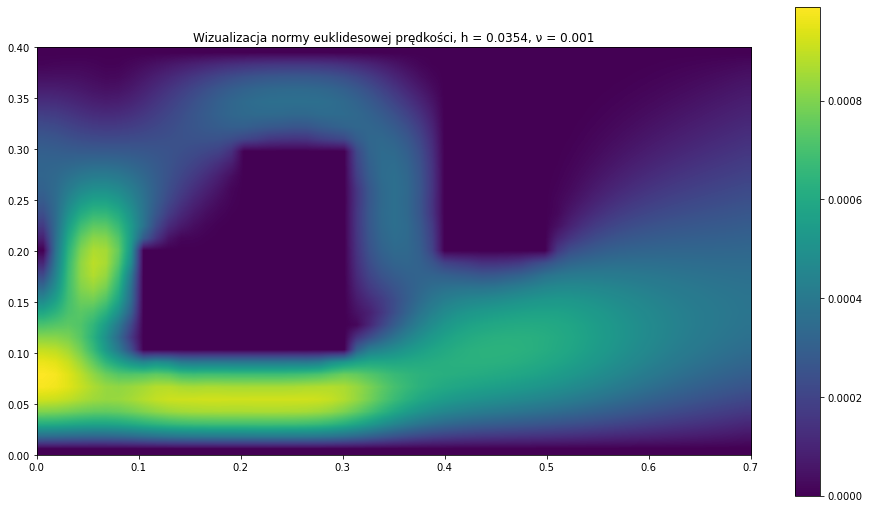

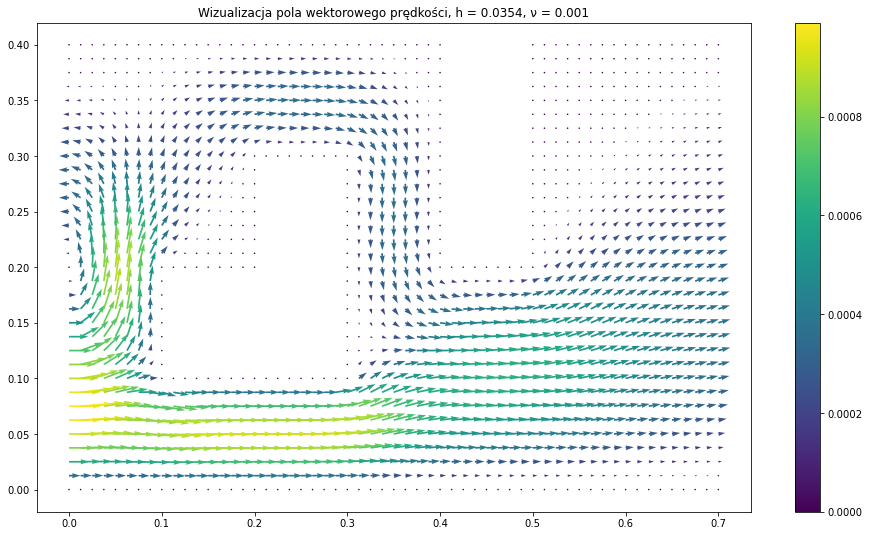

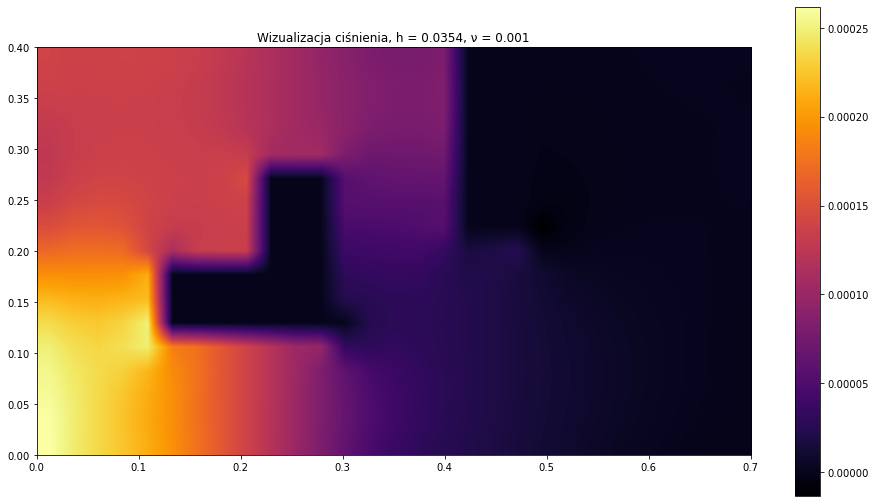

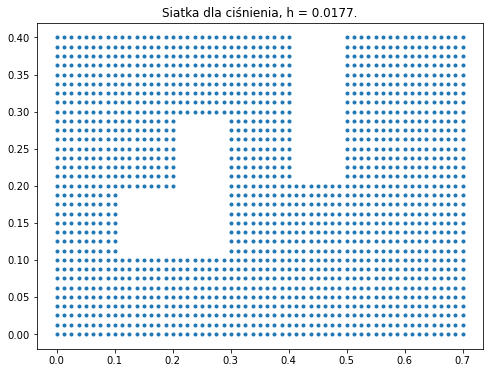

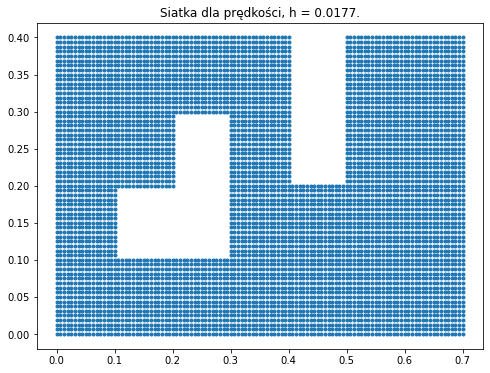

Liczba równań:  13928


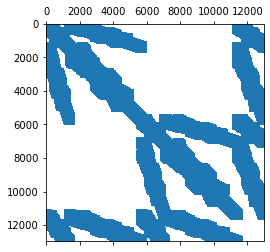

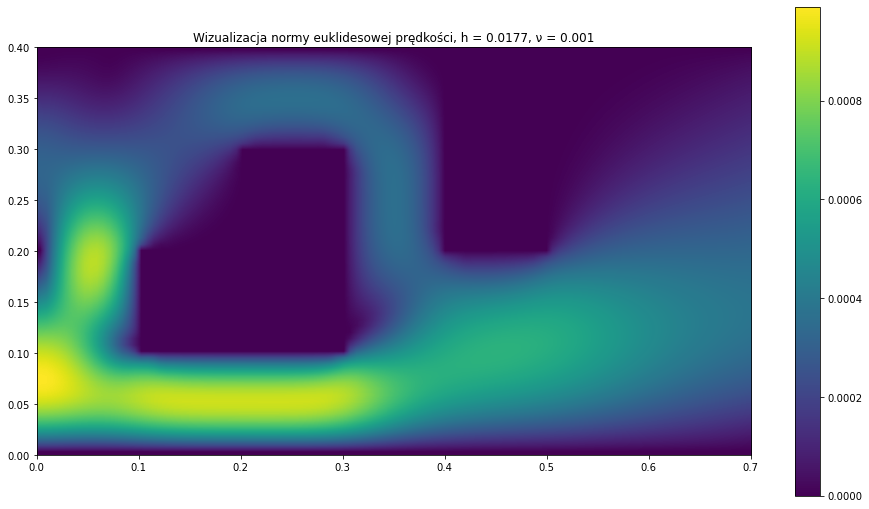

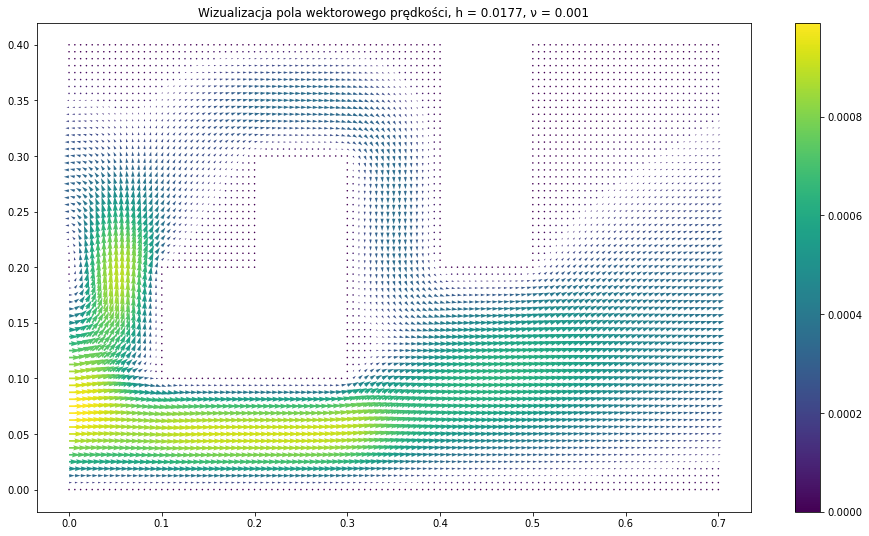

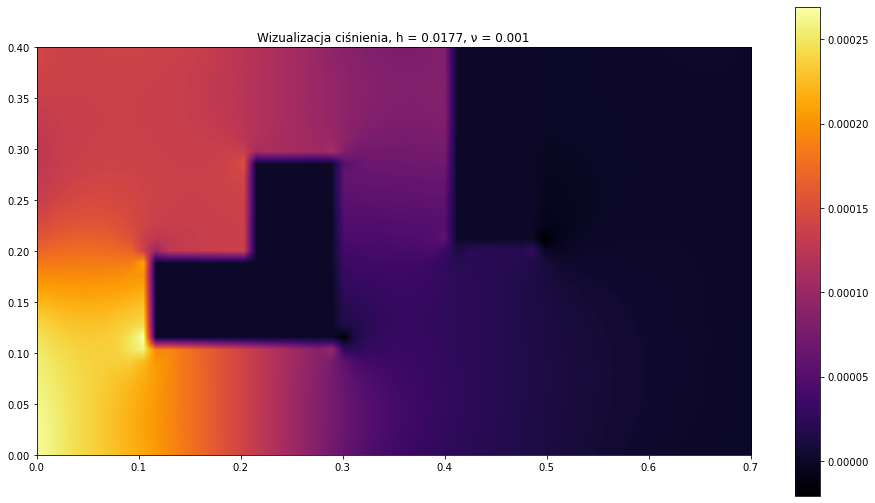

(436,)
(436,)


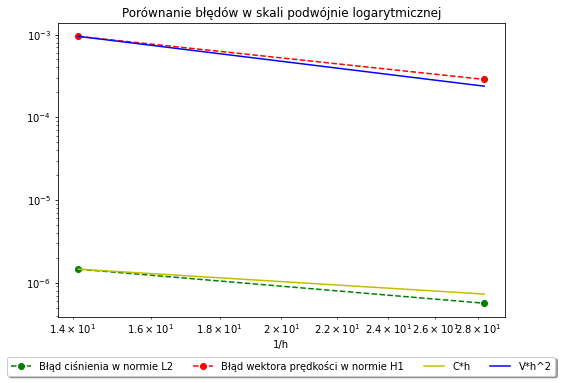

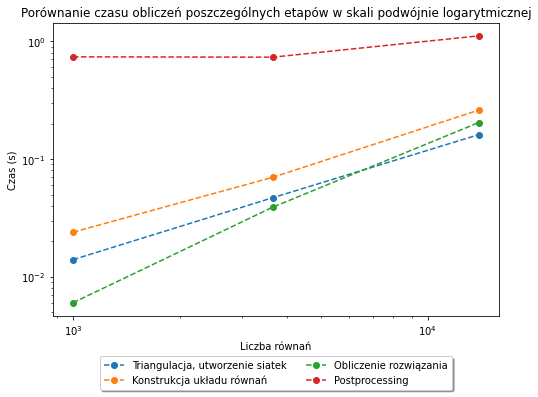

arr_period0:  [0.01400042 0.04696083 0.16096282]
arr_period1:  [0.02396512 0.06995797 0.25999737]
arr_period2:  [0.00603986 0.03903389 0.20393896]
arr_period3:  [0.73600197 0.73099852 1.10803127]
h:  [0.07071067811865477, 0.03535533905932738, 0.01767766952966369]
L2_errors:  [1.4579963420631445e-06, 5.645825661611203e-07]
H1_errors:  [0.0009510826878728929, 0.0002868325803996069]


In [11]:
# scale_elements_width = [2,4,8,16,32,64]  # przeskalowanie szerokości elementów dla kolejnych siatek
# scale_elements_height = [2,4,8,16,32,64]  # przeskalowanie długości elementów dla kolejnych siatek

scale_elements_width = [2,4,8]  # przeskalowanie szerokości elementów dla kolejnych siatek
scale_elements_height = [2,4,8]  # przeskalowanie długości elementów dla kolejnych siatek

multiple_stokes_stationary(wall=mywall, obstacles=myobstacles, debug_mode = debug_mode,
                              dirichlet_z = dirichlet_zero, dirichlet_f = dirichlet_fun, scale_axes = scale_axes, scale_elements_width =scale_elements_width, scale_elements_height = scale_elements_height, viscosity=viscosity, force_option=force_option)